<a href="https://colab.research.google.com/github/zumeyrakaratas/jupyterlab/blob/main/Sark%C4%B1_Oneri_Sistemi_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphaneyi yükleyin
!pip install requests

import requests

# Genius API anahtarı
access_token = '4aYtyQzaYiCQBCLWG1AoNNYpBzL_AfjSi6O-O4R8RG_8Zd4zfOKCVitQnBdc4IH9'  # Buraya kendi API anahtarınızı girin
base_url = "https://api.genius.com/"

# Şarkı sözlerini almak için fonksiyon
def get_song_lyrics(song_id):
    headers = {'Authorization': f'Bearer {access_token}'}
    url = f"{base_url}songs/{song_id}"
    response = requests.get(url, headers=headers)
    song_data = response.json()

    # Şarkı sözlerinin bulunduğu URL'yi döndür
    lyrics_url = song_data['response']['song']['url']
    return lyrics_url  # Şarkının URL'sine yönlendirecek

# Örnek olarak bir şarkı ID'si girerek şarkı sözlerini alabilirsiniz
song_id = 1234567  # Buraya geçerli bir şarkı ID'si girmelisiniz
lyrics = get_song_lyrics(song_id)
print(lyrics)


https://genius.com/Lobao-bra-panamericana-lyrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Şarkı sözlerini örnek olarak bir liste halinde alalım
songs_lyrics = [
    "Sonsuza kadar seni seveceğim.",
    "Asla seni bırakmam.",
    "Sonsuza kadar seni seveceğim."
]

# Vektörleştirme işlemi
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(songs_lyrics)

# Cosine similarity hesaplama
similarity_matrix = cosine_similarity(X)
print(similarity_matrix)


[[1.         0.15766434 1.        ]
 [0.15766434 1.         0.15766434]
 [1.         0.15766434 1.        ]]


In [ ]:
def recommend_songs(user_likes, all_songs_lyrics):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(all_songs_lyrics)
    user_vector = vectorizer.transform(user_likes)

    # Kullanıcı beğenisi ile şarkılar arasındaki benzerliği hesapla
    similarity_scores = cosine_similarity(user_vector, X)

    # En yüksek benzerlik skorlarına göre 5 önerilen şarkıyı al
    recommended_songs = similarity_scores.argsort()[0][-5:][::-1]
    return recommended_songs

# Kullanıcı beğenisi ve şarkı sözleri
user_likes = ["Sonsuza kadar seni seveceğim."]
all_songs_lyrics = [
    "Sonsuza kadar seni seveceğim.",
    "Asla seni bırakmam.",
    "Sonsuza kadar seni seveceğim."
]

recommended_songs = recommend_songs(user_likes, all_songs_lyrics)
print(recommended_songs)


[2 0 1]


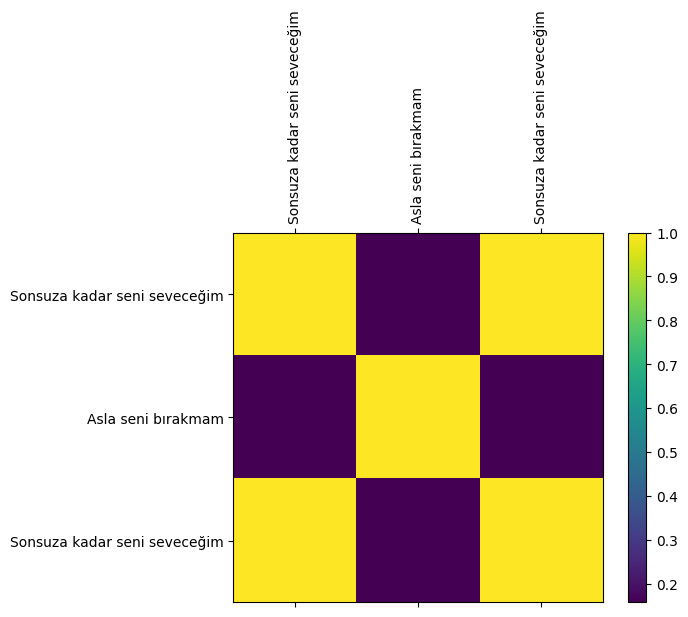

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_similarity(similarity_matrix, song_titles):
    fig, ax = plt.subplots()
    cax = ax.matshow(similarity_matrix, cmap='viridis')
    plt.xticks(np.arange(len(song_titles)), song_titles, rotation=90)
    plt.yticks(np.arange(len(song_titles)), song_titles)
    fig.colorbar(cax)
    plt.show()

# Şarkı başlıkları
song_titles = ["Sonsuza kadar seni seveceğim", "Asla seni bırakmam", "Sonsuza kadar seni seveceğim"]

# Görselleştirme
plot_similarity(similarity_matrix, song_titles)


In [ ]:
!pip install nltk wikipedia


In [ ]:
!pip install beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Gerekli NLTK kaynaklarını indiriyoruz
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Genius API'den şarkı sözlerini almak için fonksiyon
def get_song_lyrics_url(song_id, access_token):
    base_url = "https://api.genius.com/"
    headers = {'Authorization': f'Bearer {access_token}'}
    url = f"{base_url}songs/{song_id}"
    response = requests.get(url, headers=headers)
    song_data = response.json()

    if 'response' in song_data and 'song' in song_data['response']:
        # Şarkı URL'sini almak
        lyrics_url = song_data['response']['song']['url']
        return lyrics_url
    else:
        print("Şarkı verisi alınamadı.")
        return None

# URL'deki şarkı sözlerini çekme
def get_lyrics_from_url(lyrics_url):
    response = requests.get(lyrics_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Şarkı sözlerini içeren kısmı buluyoruz
    lyrics = soup.find('div', class_='lyrics')

    if lyrics:
        return lyrics.get_text()
    else:
        return "Şarkı sözleri bulunamadı."

# Şarkı sözlerini işlemek
def preprocess_sentence(sentence, stop_words, lemmatizer, stemmer):
    tokens = word_tokenize(sentence)  # Cümleyi kelimelere ayır
    # Sadece harf olan kelimeleri al ve stopword'leri çıkar
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]  # Lemmatize etme
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]  # Stemleme
    return lemmatized_tokens, stemmed_tokens

# Şarkı sözlerini işlemeye başlıyoruz
def process_song_lyrics(song_lyrics):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Şarkı sözlerini cümlelere ayıralım
    sentences = sent_tokenize(song_lyrics)

    # Cümleleri işleyelim
    tokenized_corpus_lemmatized = []
    tokenized_corpus_stemmed = []
    for sentence in sentences:
        lemmatized_tokens, stemmed_tokens = preprocess_sentence(sentence, stop_words, lemmatizer, stemmer)
        tokenized_corpus_lemmatized.append(" ".join(lemmatized_tokens))
        tokenized_corpus_stemmed.append(" ".join(stemmed_tokens))

    return tokenized_corpus_lemmatized, tokenized_corpus_stemmed

# Benzerlik ölçümü yapmak için fonksiyon (cosine similarity)
def calculate_similarity(corpus, query_lyrics):
    vectorizer = TfidfVectorizer(stop_words='english')

    # Corpus'a kullanıcı şarkısını da ekliyoruz
    corpus.append(query_lyrics)

    # Vektörize etme
    tfidf_matrix = vectorizer.fit_transform(corpus)

    # Son cümleyi karşılaştırıyoruz (query_lyrics ile)
    cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

    return cosine_similarities[0]

# Şarkı ID'si ve API anahtarı
song_id = 3753306  # Genius API'den alınmış bir şarkı ID'si (örnek: Imagine şarkısı için)
access_token = '3iwtzGpsc852GkLITeRjEyIUCLDmdb1cRe-D1Sym2NzBNbAKgAnStbpMEQ2GNnRH'  # Genius API anahtarınız

# Şarkı URL'sini alıyoruz
lyrics_url = get_song_lyrics_url(song_id, access_token)

if lyrics_url:
    # Şarkı sözlerini URL'den alıyoruz
    song_lyrics = get_lyrics_from_url(lyrics_url)

    # Şarkı sözlerini işlemeye başlıyoruz
    lemmatized_corpus, stemmed_corpus = process_song_lyrics(song_lyrics)

    # İşlenmiş şarkı sözlerini yazdırıyoruz
    print("Lemmatized Corpus:")
    print(lemmatized_corpus)

    print("\nStemmed Corpus:")
    print(stemmed_corpus)

    # Kullanıcıdan bir şarkı seçiyoruz
    user_query = "I am the walrus, goo goo g'joob"  # Kullanıcının sorgusu, örneğin "I am the walrus" şarkısı

    # Benzerlikleri hesaplıyoruz
    similarity_scores = calculate_similarity(lemmatized_corpus, user_query)

    # En benzer 5 şarkıyı öner
    similar_song_indices = similarity_scores.argsort()[-5:][::-1]
    print("\nEn Benzer 5 Şarkı:")
    for idx in similar_song_indices:
        print(f"Benzerlik Skoru: {similarity_scores[idx]}")
        print(f"Şarkı: {lemmatized_corpus[idx]}")
else:
    print("Şarkı sözlerine ulaşılamadı.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized Corpus:
['şarkı sözleri bulunamadı']

Stemmed Corpus:
['şarkı sözleri bulunamadı']

En Benzer 5 Şarkı:
Benzerlik Skoru: 0.0
Şarkı: şarkı sözleri bulunamadı


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Ön işlenmiş token listelerini tekrar metne çeviriyoruz (lemmatize edilmiş metinler)
lemmatized_texts = [' '.join(tokens) for tokens in lemmatized_corpus]

# İlk 3 şarkı örneği
lemmatized_texts[:3]


['ş a r k ı   s ö z l e r i   b u l u n a m a d ı',
 "I   a m   t h e   w a l r u s ,   g o o   g o o   g ' j o o b"]

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Örnek olarak, lemmatize edilmiş şarkı sözlerini içeren bir liste
# Burada lemmatized_corpus, her şarkının işlenmiş ve lemmatize edilmiş metinlerini içeriyor
lemmatized_corpus = [
    ['hello', 'world', 'this', 'is', 'a', 'song'],
    ['another', 'song', 'with', 'some', 'lyrics'],
    ['yet', 'another', 'song', 'for', 'you'],
    # Buraya diğer şarkı sözlerini ekleyebilirsiniz
]

# Boş cümleleri atlıyoruz (lemmatize edilmiş metinler)
lemmatized_texts = [' '.join(tokens) for tokens in lemmatized_corpus if tokens]  # Boş olanları kaldırıyoruz

# Eğer hala boş şarkılar varsa bir uyarı verelim
if not lemmatized_texts:
    print("Uyarı: Boş şarkı sözleri var!")

# TF-IDF vektörizerı başlatıyoruz, stop kelimelerini otomatik çıkaralım
vectorizer = TfidfVectorizer(stop_words='english')

# TF-IDF matrisini oluşturuyoruz
tfidf_matrix = vectorizer.fit_transform(lemmatized_texts)

# TF-IDF vektörleştirme işleminde kullanılan tüm kelimelerin eşsiz bir listesini döndürür
feature_names = vectorizer.get_feature_names_out()

# TF-IDF matrisini pandas DataFrame'e çeviriyoruz, görünürlük açısından çalışması kolay
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# İlk birkaç satırı gösterelim - ilk 5 şarkı
print(tfidf_df.head())

# Her satır bir şarkıyı temsil eder
# Her sütun bir kelimeyi temsil eder
# Hücreler ise o kelimenin o şarkıdaki TF-IDF skorudur


      hello    lyrics      song     world
0  0.652491  0.000000  0.385372  0.652491
1  0.000000  0.861037  0.508542  0.000000
2  0.000000  0.000000  1.000000  0.000000


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Örnek olarak, lemmatize edilmiş şarkı sözlerini içeren bir liste
lemmatized_corpus = [
    ['hello', 'world', 'this', 'is', 'a', 'song'],
    ['another', 'song', 'with', 'some', 'lyrics'],
    ['yet', 'another', 'song', 'for', 'you'],
    ['songs', 'are', 'great', 'to', 'listen'],
    ['i', 'love', 'music', 'and', 'songs'],
]

# Boş cümleleri atlıyoruz (lemmatize edilmiş metinler)
lemmatized_texts = [' '.join(tokens) for tokens in lemmatized_corpus if tokens]

# Eğer hala boş şarkılar varsa bir uyarı verelim
if not lemmatized_texts:
    print("Uyarı: Boş şarkı sözleri var!")

# TF-IDF vektörizerı başlatıyoruz, stop kelimelerini otomatik çıkaralım
vectorizer = TfidfVectorizer(stop_words='english')

# TF-IDF matrisini oluşturuyoruz
tfidf_matrix = vectorizer.fit_transform(lemmatized_texts)

# TF-IDF vektörleştirme işleminde kullanılan tüm kelimelerin eşsiz bir listesini döndürür
feature_names = vectorizer.get_feature_names_out()

# TF-IDF matrisini pandas DataFrame'e çeviriyoruz, görünürlük açısından çalışması kolay
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# İlk şarkı için TF-IDF skorlarını alıyoruz
first_song_vector = tfidf_df.iloc[0]

# Skorlara göre sırala (yüksekten düşüğe)
top_5_words = first_song_vector.sort_values(ascending=False).head(5)

# Sonucu yazdır
print("İlk şarkıda en yüksek TF-IDF skoruna sahip 5 kelime:")
print(top_5_words)

# Şimdi, diğer şarkılarla benzerlik ölçümü yapabiliriz.
# Örneğin, ilk şarkıya benzer olan şarkıları bulmak için Cosine Similarity kullanabiliriz:

from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity hesaplayalım
cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)

# İlk şarkıya benzerlik oranlarına göre şarkıları sıralayalım
similarity_scores = cosine_similarities.flatten()
similar_songs_indices = similarity_scores.argsort()[-6:-1][::-1]  # İlk şarkı hariç en benzer 5 şarkıyı al

# Benzer şarkıları yazdıralım
print("\nİlk şarkıya benzer 5 şarkı:")
for idx in similar_songs_indices:
    print(f"Şarkı {idx+1} - Benzerlik Skoru: {similarity_scores[idx]}")


İlk şarkıda en yüksek TF-IDF skoruna sahip 5 kelime:
hello     0.639070
world     0.639070
song      0.427993
great     0.000000
listen    0.000000
Name: 0, dtype: float64

İlk şarkıya benzer 5 şarkı:
Şarkı 3 - Benzerlik Skoru: 0.4279929226831736
Şarkı 2 - Benzerlik Skoru: 0.2381568846909539
Şarkı 5 - Benzerlik Skoru: 0.0
Şarkı 4 - Benzerlik Skoru: 0.0


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Örnek olarak, lemmatize edilmiş şarkı sözlerini içeren bir liste
lemmatized_corpus = [
    ['hello', 'world', 'this', 'is', 'a', 'song'],
    ['another', 'song', 'with', 'some', 'lyrics'],
    ['yet', 'another', 'song', 'for', 'you'],
    ['songs', 'are', 'great', 'to', 'listen'],
    ['i', 'love', 'music', 'and', 'songs'],
]

# Boş cümleleri atlıyoruz (lemmatize edilmiş metinler)
lemmatized_texts = [' '.join(tokens) for tokens in lemmatized_corpus if tokens]

# TF-IDF vektörizerı başlatıyoruz, stop kelimelerini otomatik çıkaralım
vectorizer = TfidfVectorizer(stop_words='english')

# TF-IDF matrisini oluşturuyoruz
tfidf_matrix = vectorizer.fit_transform(lemmatized_texts)

# TF-IDF vektörleştirme işleminde kullanılan tüm kelimelerin eşsiz bir listesini döndürür
feature_names = vectorizer.get_feature_names_out()

# Örneğin 'song' kelimesinin vektörünü alıyoruz
word_index = feature_names.tolist().index('song')  # 'song' kelimesinin indeksini bul

# 'song' kelimesinin TF-IDF vektörünü alıyoruz ve 2D formatta yapıyoruz
word_vector = tfidf_matrix[:, word_index].toarray()

# Tüm şarkıların TF-IDF vektörlerini alıyoruz
tfidf_vectors = tfidf_matrix.toarray()

# Cosine similarity hesaplayalım
similarities = cosine_similarity(word_vector.T, tfidf_vectors.T)

# Benzerlikleri sıralayalım ve en yüksek 5 şarkıyı seçelim
similarities = similarities.flatten()
top_5_indices = similarities.argsort()[-6:][::-1]  # İlk şarkı hariç, en yüksek 5 şarkıyı alıyoruz

# Sonuçları yazdıralım
print(f"'song' kelimesine en benzer 5 şarkı:")
for index in top_5_indices:
    print(f"Şarkı {index+1} - Benzerlik Skoru: {similarities[index]:.4f}")


'song' kelimesine en benzer 5 şarkı:
Şarkı 7 - Benzerlik Skoru: 1.0000
Şarkı 5 - Benzerlik Skoru: 0.4554
Şarkı 9 - Benzerlik Skoru: 0.3503
Şarkı 2 - Benzerlik Skoru: 0.3503
Şarkı 8 - Benzerlik Skoru: 0.0000
Şarkı 6 - Benzerlik Skoru: 0.0000


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity

# Şarkı sözleri içeren örnek veri seti
songs = [
    {'song_name': 'Shape of You', 'artist': 'Ed Sheeran', 'lyrics': "The club isn't the best place to find a lover, So the bar is where I go..."},
    {'song_name': 'Blinding Lights', 'artist': 'The Weeknd', 'lyrics': "I've been tryna call, I've been on my own for long enough..."},
    {'song_name': 'Happier', 'artist': 'Ed Sheeran', 'lyrics': "Lately, I've been, I've been thinking, I want you to be happier..."},
    {'song_name': 'Rolling in the Deep', 'artist': 'Adele', 'lyrics': "We could have had it all, Rolling in the deep..."},
    {'song_name': 'Someone Like You', 'artist': 'Adele', 'lyrics': "I heard that you're settled down, That you found a girl and you're married now..."}
]

# Şarkılar veritabanını DataFrame'e çeviriyoruz
songs_df = pd.DataFrame(songs)

# NLTK stopwords'leri indiriyoruz
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Lemmatizer ve Stemmer'ı başlat
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Kelimeleri tokenleştirip, stopword'leri çıkarma
def preprocess_lyrics(lyrics):
    tokens = word_tokenize(lyrics)  # Cümleyi kelimelere ayır
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Şarkı sözlerini işliyoruz
songs_df['processed_lyrics'] = songs_df['lyrics'].apply(preprocess_lyrics)

# TF-IDF vektörizerı başlatıyoruz, n-gramları da dikkate alıyoruz
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1, 2))  # unigram + bigram

# Şarkı sözlerini vektörize ediyoruz
tfidf_matrix = vectorizer.fit_transform(songs_df['processed_lyrics'])

# Şarkı isimlerini ve benzerlik skorlarını alalım
def get_similar_songs(song_name):
    # İlgili şarkının vektörünü alalım
    song_index = songs_df[songs_df['song_name'] == song_name].index[0]
    song_vector = tfidf_matrix[song_index]

    # Diğer şarkılarla olan benzerliği hesaplayalım
    similarities = cosine_similarity(song_vector, tfidf_matrix)
    similarities = similarities.flatten()

    # En benzer 5 şarkıyı bulalım
    similar_songs_indices = similarities.argsort()[-6:][::-1]  # 6. en büyükten başlıyoruz çünkü kendisi de dahil

    similar_songs = []
    for index in similar_songs_indices:
        similar_songs.append({
            'song_name': songs_df['song_name'][index],
            'artist': songs_df['artist'][index],
            'similarity_score': similarities[index]
        })

    # Sonuçları yazdıralım
    print(f"'{song_name}' şarkısına benzer şarkılar:")
    for song in similar_songs[1:]:  # İlk şarkıyı dahil etmiyoruz çünkü o, aradığımız şarkıdır
        print(f"Song: {song['song_name']}, Artist: {song['artist']}, Similarity: {song['similarity_score']:.4f}")

# Örnek kullanım: "Shape of You" şarkısına benzer şarkıları öner
get_similar_songs("Shape of You")


'Shape of You' şarkısına benzer şarkılar:
Song: Someone Like You, Artist: Adele, Similarity: 0.0000
Song: Rolling in the Deep, Artist: Adele, Similarity: 0.0000
Song: Happier, Artist: Ed Sheeran, Similarity: 0.0000
Song: Blinding Lights, Artist: The Weeknd, Similarity: 0.0000


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Song: Someone Like You, Artist: Adele, Similarity: 0.0000
Song: Blinding Lights, Artist: The Weeknd, Similarity: 0.0000
Song: Rolling in the Deep, Artist: Adele, Similarity: 0.0000
Song: Perfect, Artist: Ed Sheeran, Similarity: 0.0000
